In [1]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

Using TensorFlow backend.


In [2]:
pwd


'C:\\Users\\sidft\\Documents\\digit-recognizer'

In [3]:
train = pd.read_csv('C://Users//sidft//Documents//digit-recognizer/train.csv')

In [4]:
test = pd.read_csv('C://Users//sidft//Documents//digit-recognizer/test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


<b>785 columns corresponding to 784 values(28*28) and a label.</b>

<b>The output variable is an integer ranging from 0 to 9.Therefore it is a multiclass classification problem. </b>

In [6]:
y_train = train['label']

# Drop 'label' column
X_train = train.drop(labels = ['label'],axis = 1) 

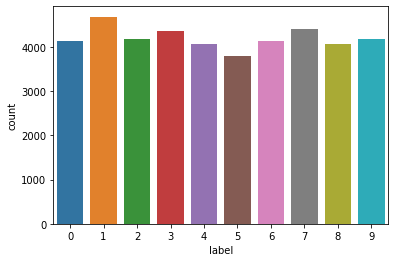

In [7]:
g = sns.countplot(y_train)

<b>We can see that the counts for all digits are similar.</b>

In [8]:
X_train.isnull().any().sum()

0

In [9]:
test.isnull().any().sum()

0

<b>There are no missing values in train and test dataset.</b>

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

<b>Now we reshape our data,keras requires an extra dimension which represents the number of channels.In the case of RGB images the number of channels would be 3,but since in this MNIST dataset we are dealing with gray scale images the number of channels is one.Train and test images each of 28px x 28px, these are represented in a pandas Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.</b>

In [11]:
X_train = X_train / 255.0
test = test / 255.0

<b>Here we centre our data around zero mean,this allows the CNN to converge faster.</b>


In [12]:
y_train = to_categorical(y_train, num_classes = 10)

<b>Labels have values ranging from 0-9.we encode these labels to one hot vectors.For example,3 is represented as [0,0,1,0,0,0,0,0,0,0].</b>

In [13]:
seed = 43
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=seed)

<b>Here we split our train set into two parts,90% is used to train the model and rest 10% is used  as validation set.As we saw earlier the digits from 0-9 were of similar counts and since our train set has 42000 images the validation set will be well balanced.</b>

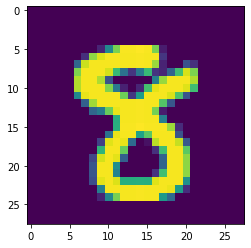

In [14]:
g = plt.imshow(X_train[0][:,:,0])

### Creating Neural Network to train model
- <b> So here I use 32 filters for the two firsts Conv2D layers and 64 filters for the last two Conv2D layers.For all these layers we give some padding so that the output will be of the same size as the input</b>
- <b> Followed by is the Max pooling layer which takes the maximum value from the given set of pixels(in our case it looks at two neighbouring pixels).These are used to reduce the high computational cost,and to some extent also reduce overfitting.</b>
- <b>After that is the drop out layer which randomely drops units from the neural network to reduce overfitting.</b>
- <b>Then we flatten the data into a 1-dimensional array for inputing it to the fully connected layer.</b>

In [15]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32,(3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(64,(3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


<b>The optimizer used here is RMSprop and loss function is Categorical crossentropy.</b>

In [16]:
model.compile(optimizer = RMSprop(lr = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'] )

In [17]:
epochs = 20
batch_size = 86

### Data Augmentation
<b>This technique is used to address the problem of overfitting.Here we increase the size of our training data by making small changes to the images.Here i did not perform horizontal or vertical flip as it can misclassify symmetrical numbers  like 6 and 9.</b>

In [18]:
IDG = ImageDataGenerator(
        rotation_range=10,
        shear_range=0.3,
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 


IDG.fit(X_train)

In [19]:
history = model.fit_generator(IDG.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/20
 - 112s - loss: 0.3670 - accuracy: 0.8844 - val_loss: 0.0421 - val_accuracy: 0.9881
Epoch 2/20
 - 111s - loss: 0.1191 - accuracy: 0.9635 - val_loss: 0.0358 - val_accuracy: 0.9886
Epoch 3/20
 - 111s - loss: 0.0870 - accuracy: 0.9735 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 4/20
 - 111s - loss: 0.0773 - accuracy: 0.9783 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 5/20
 - 111s - loss: 0.0673 - accuracy: 0.9805 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 6/20
 - 113s - loss: 0.0607 - accuracy: 0.9826 - val_loss: 0.0221 - val_accuracy: 0.9933
Epoch 7/20
 - 117s - loss: 0.0617 - accuracy: 0.9821 - val_loss: 0.0291 - val_accuracy: 0.9929
Epoch 8/20
 - 115s - loss: 0.0575 - accuracy: 0.9832 - val_loss: 0.0296 - val_accuracy: 0.9917
Epoch 9/20
 - 114s - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0393 - val_accuracy: 0.9886
Epoch 10/20
 - 112s - loss: 0.0562 - accuracy: 0.9838 - val_loss: 0.0356 - val_accuracy: 0.9910
Epoch 11/20
 - 112s - loss: 0.0548 - accuracy: 0.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


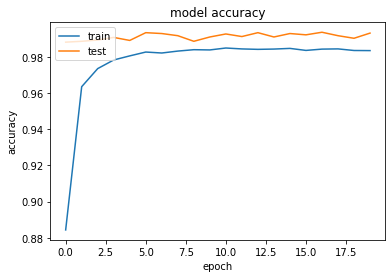

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()